## Importamos las librerías 

In [5]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, ListedColormap

## Graficos 

### Figura 1

<img src="../images/figura_1.png">

#### Reshape 

In [2]:
figura_1 = pd.read_csv('../data/data_figura_1.csv')
figura_1.shape

(5, 5)

In [3]:
figura_1.head()

,interest,before,after,formatted_before,formatted_after
0,Bored,11,12,11%,12%
1,Not great,5,6,5%,6%
2,OK,40,14,40%,14%
3,Kind of interested,25,30,25%,30%
4,Excited,19,38,19%,38%


#### Plot

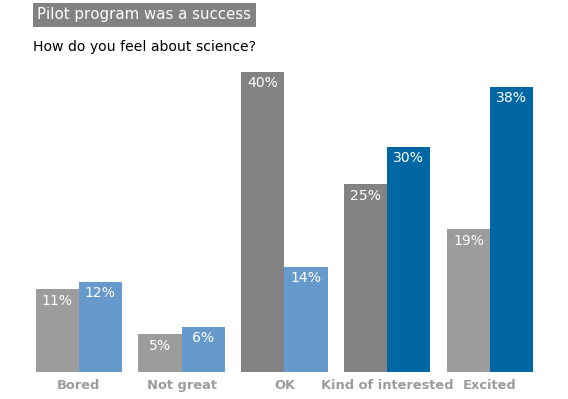

In [6]:
# Colores
cmap_before = ListedColormap(['#9c9c9c', '#828282']) 
norm_before = Normalize(vmin=figura_1['before'].min(), vmax=figura_1['before'].max())

mapper_before = cmap_before(norm_before(figura_1['before'].to_list()))

cmap_after = ListedColormap(['#6699CC', '#0067a5']) 
norm_after = Normalize(vmin=figura_1['after'].min(), vmax=figura_1['after'].max())

mapper_after = cmap_after(norm_after(figura_1['after'].to_list()))


# Instanciamos el grafico
width = 0.42

x = np.arange(figura_1.shape[0])

fig, ax = plt.subplots(figsize=(8, 5))

before_rect = ax.bar(x - width/2, figura_1['before'], width, color=mapper_before)
after_rect = ax.bar(x + width/2, figura_1['after'], width, color=mapper_after)

# Funcion para agregar anotaciones en las barras
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -18),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    size=14, color='white')


# Quitamos las lineas del grafico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# Eje x
ax.set_xticks(x)
ax.set_xticklabels(figura_1['interest'], color='#9c9c9c', size=13, weight='bold', family='sans-serif')
ax.xaxis.set_ticks_position('none') 

# Eje y
ax.yaxis.set_ticklabels([])
ax.yaxis.set_ticks_position('none') 

# Seteamos el texto dentro de la barra
autolabel(before_rect)
autolabel(after_rect)

fig.tight_layout()

# Titulo
plt.suptitle('Pilot program was a success',fontsize=15, y=1.10, x=0.07, ha='left', 
             color='white', backgroundcolor='#828282')


plt.title('How do you feel about science?', fontsize=14, loc='left', x=0.04)

plt.show()